In [39]:
import umap
import pandas as pd
import numpy as np 
from modelling_pipeline import features
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from sklearn import decomposition
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['font.family'] = 'Optima'
mpl.rcParams['text.usetex'] = 'False'

In [40]:
df = pd.read_csv('data/ukgov-gpg-all-clean-with-features.csv')
df = df.dropna(subset=features + ['QuantDiffMedianBonusPercent'])
classes = [
    '<-50%',
    '-50%..-25%',
    '-25%..-10%',
    '-10%..-2%',
    '-2%..2%',
    '2%..10%',
    '10%..25%',
    '25%..50%',
    '>50%'
]
df.head()


,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,PercMaleWorkforceInLowerQuartile,PercFemaleWorkforceInTopQuartile,PercFemaleWorkforceInUpperMiddleQuartile,PercFemaleWorkforceInLowerMiddleQuartile,PercFemaleWorkforceInLowerQuartile,RepresentationInTopQuartileSkew,RepresentationInUpperMiddleQuartileSkew,RepresentationInLowerMiddleQuartileSkew,RepresentationInLowerQuartileSkew,BonusGenderSkew
0,"""Bryanston School"",Incorporated","Bryanston House, Blandford, Dorset, DT11 0PX",00226143,['85310'],18.0,28.2,0.0,0.0,0.0,0.0,...,0.138715,0.216421,0.226685,0.219545,0.337349,0.076359,0.053020,0.069256,-0.198634,0.0
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU",SC016876,['47730'],2.3,-2.7,15.0,37.5,15.6,66.7,...,0.273954,0.251304,0.275238,0.228905,0.244554,-0.007040,-0.136236,0.113875,0.029401,-51.1
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam, Ground Floor, ...",03951948,['61900'],1.7,2.8,13.1,13.6,70.0,57.0,...,0.240566,0.223404,0.265957,0.250000,0.260638,0.050181,-0.030108,0.000000,-0.020072,13.0
3,123 EMPLOYEES LTD,"34 Roundhay Road, Leeds, England, LS7 1AB",10530651,['78300'],41.0,36.0,-69.8,-157.2,50.0,73.5,...,0.000000,0.211538,0.244505,0.269231,0.274725,0.427350,0.061050,-0.213675,-0.274725,-23.5
4,1610 LIMITED,"Hestercombe House, Cheddon Fitzpaine, Taunton,...",06727055,['93110'],-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,0.345679,0.319328,0.294118,0.201681,0.184874,-0.171180,-0.108932,0.119307,0.160805,-50.0


/Users/thor/dev/data-science/gender-pay-gap-modelling/venv/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 33.4 s, sys: 1.34 s, total: 34.7 s
Wall time: 13.5 s


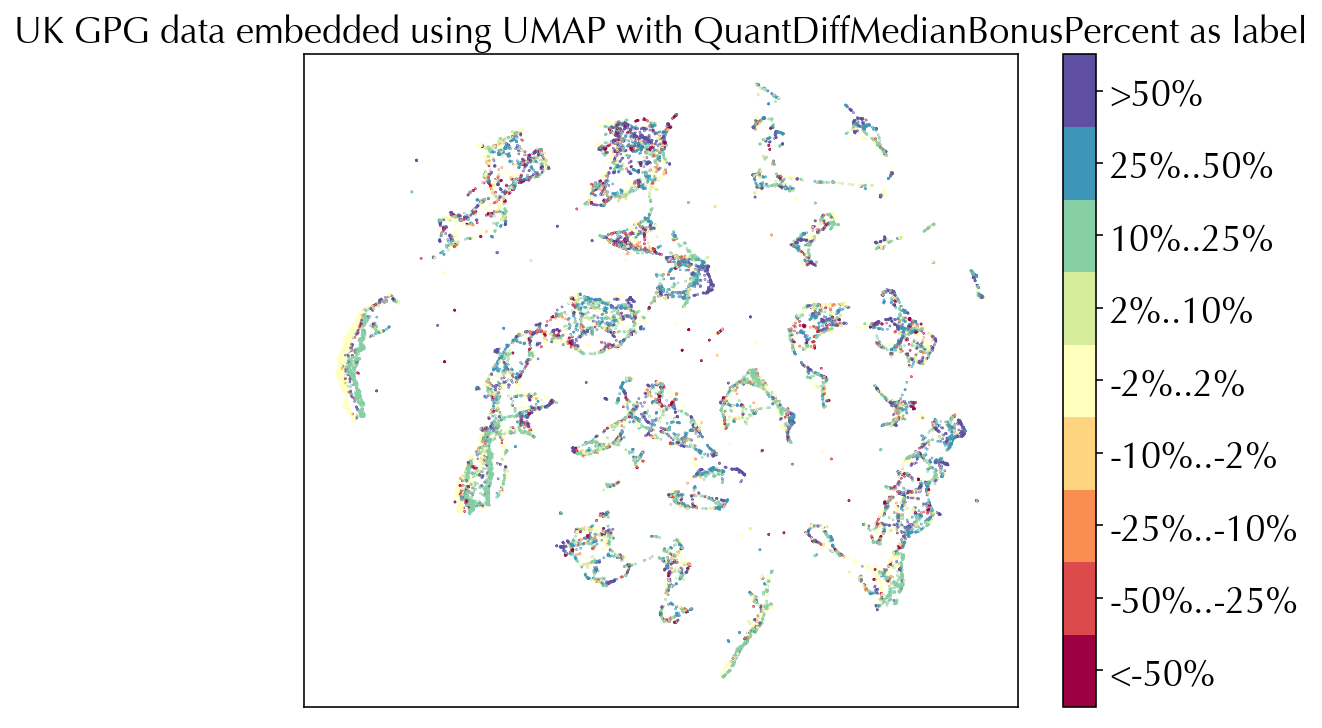

In [46]:
%%time
embedding = umap.UMAP().fit_transform(df[features], y=df['QuantDiffMedianBonusPercent'])
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=df['QuantDiffMedianBonusPercent'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(10)-0.5)
cbar.set_ticks(np.arange(9))
cbar.set_ticklabels(classes)
cbar.ax.tick_params(labelsize=18)
plt.title('UK GPG data embedded using UMAP with QuantDiffMedianBonusPercent as label', **{ 'fontsize': 18});
plt.savefig('viz/umap-median.png', dpi=150)


/Users/thor/dev/data-science/gender-pay-gap-modelling/venv/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


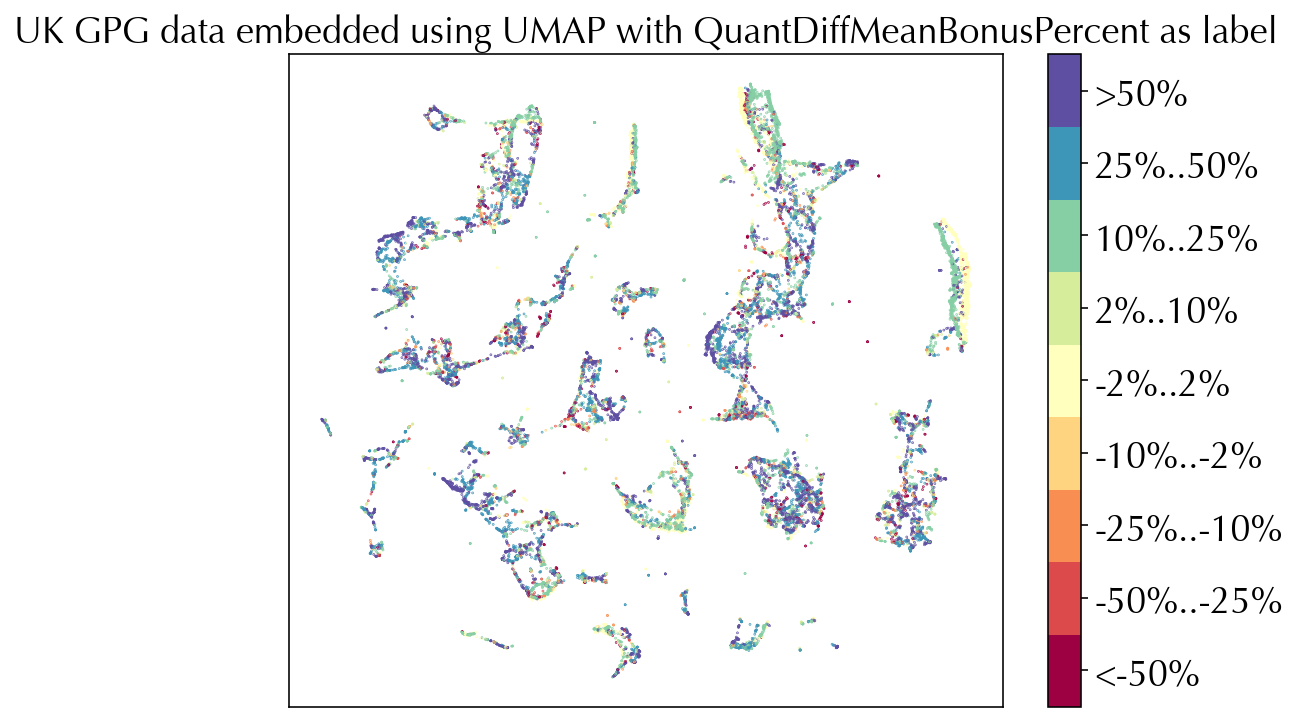

In [45]:
embedding2 = umap.UMAP().fit_transform(df[features], y=df['QuantDiffMeanBonusPercent'])

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding2.T, s=0.1, c=df['QuantDiffMeanBonusPercent'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(10)-0.5)
cbar.set_ticks(np.arange(9))
cbar.set_ticklabels(classes)
cbar.ax.tick_params(labelsize=18)
ax.set_title('UK GPG data embedded using UMAP with QuantDiffMeanBonusPercent as label', **{ 'fontsize': 18});
plt.savefig('viz/umap-mean.png', dpi=150)

<-50%
-50%..-25%
-25%..-10%
-10%..-2%
-2%..2%
2%..10%
10%..25%
25%..50%
>50%


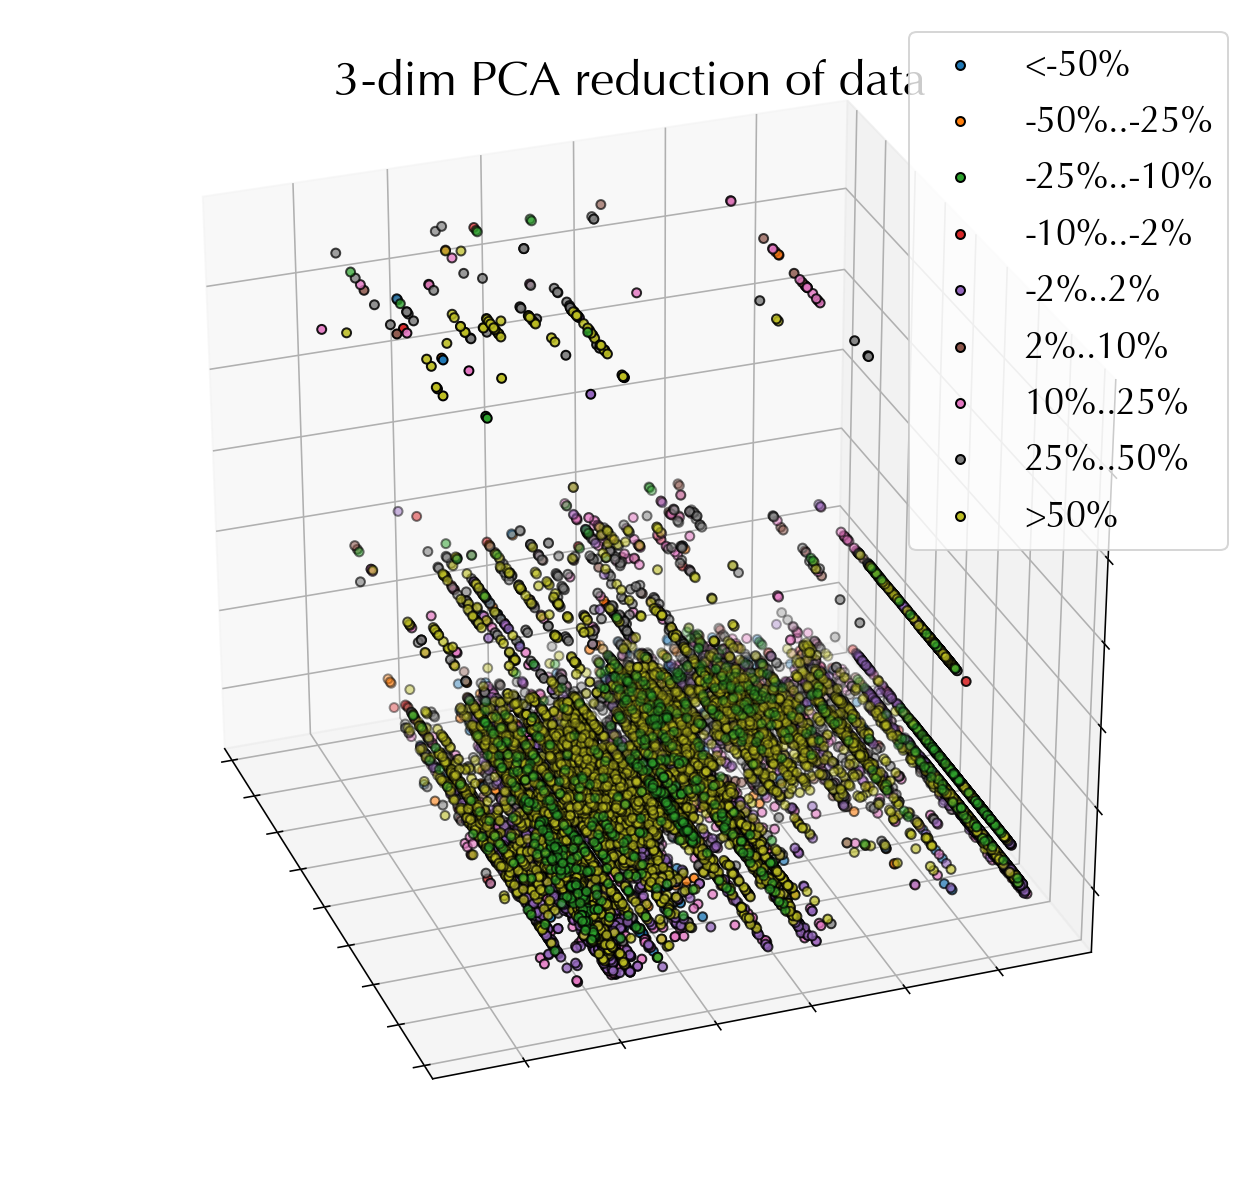

<Figure size 432x288 with 0 Axes>

In [44]:

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(df[features])
X = pca.transform(df[features])
y = df['QuantDiffMeanBonusPercent'].values

for name, label in zip(classes, range(0,len(classes))):
    print(name)
    ax.scatter(X[y == label, 2], X[y ==label, 1], X[y ==label, 0], 
               edgecolor='k',
           label=name)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.legend( **{ 'fontsize': 18})
ax.view_init(30, 160)
ax.set_title('3-dim PCA reduction of data',  **{ 'fontsize': 24})
plt.show()
plt.savefig('viz/3d-pca.png', dpi=150)
